### Importing libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Reading the data :

In [43]:
df = pd.read_csv("netflix_data.csv")

### Getting basic information about the data :

**Checking the shape of data :**

In [44]:
df.shape

(7789, 11)

**Showing top 3 records from dataset :**

In [45]:
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


**Showing bottom 3 records from dataset :**

In [46]:
df.tail(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**Removed Show_Id since it is not that useful :**

In [47]:
df.drop('Show_Id',axis = 1, inplace = True)

**Showing total values (elements) in the dataset :**

In [48]:
df.size

77890

**Showing all columns names in the dataset :**

In [49]:
df.columns

Index(['Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date',
       'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

**Showing the datatype of each column :**

In [50]:
df.dtypes

Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

**Showing basic information about the dataset :**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      7789 non-null   object
 1   Title         7789 non-null   object
 2   Director      5401 non-null   object
 3   Cast          7071 non-null   object
 4   Country       7282 non-null   object
 5   Release_Date  7779 non-null   object
 6   Rating        7782 non-null   object
 7   Duration      7789 non-null   object
 8   Type          7789 non-null   object
 9   Description   7789 non-null   object
dtypes: object(10)
memory usage: 608.6+ KB


### Data Exploration :

**Checking duplicate records :**

In [52]:
df[df.duplicated()]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


**Removing duplicate records premanently:**

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df[df.duplicated()]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [55]:
df.shape

(7787, 10)

**Count of null values in each columns :**

In [56]:
df.isnull().sum()

Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

**Using the heapmap to visualise null values :**

<AxesSubplot:>

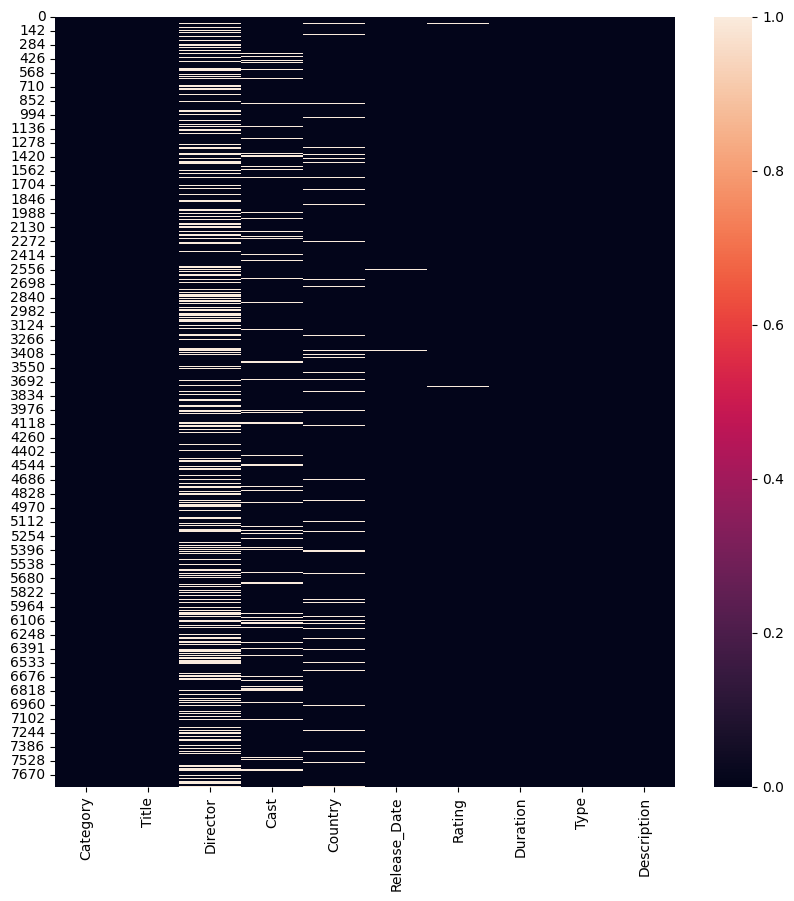

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

### In which year highest number of movies and TV shows released :

In [58]:
df.head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [59]:
df.dtypes

Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [60]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])

In [61]:
df['year'] = pd.DataFrame(df['Release_Date'].dt.year)

**count of occurance of individual years in data column**

In [63]:
year = pd.DataFrame(df['Release_Date'].dt.year.value_counts())

In [64]:
year = year.reset_index()

In [66]:
year.rename(columns = {'index':'year', 'Release_Date':'count'}, inplace = True)

In [67]:
year

,year,count
0,2019.0,2153
1,2020.0,2009
2,2018.0,1685
3,2017.0,1225
4,2016.0,443
5,2021.0,117
6,2015.0,88
7,2014.0,25
8,2011.0,13
9,2013.0,11


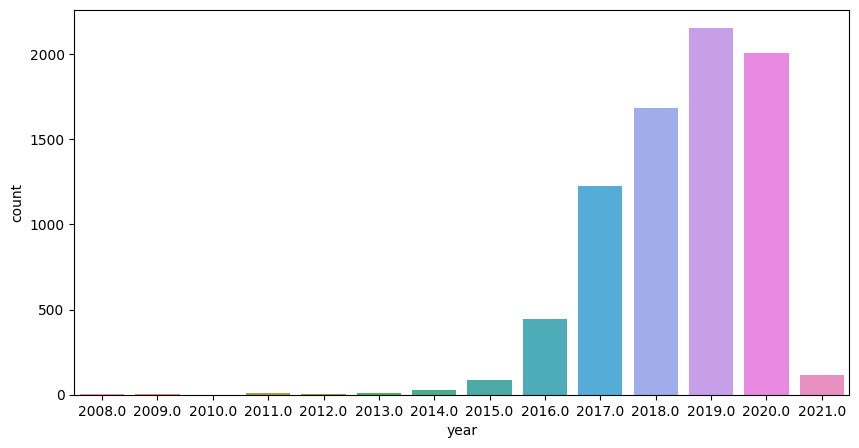

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(data = year, x="year", y="count")
plt.show()

### Insight :
- In 2019 the content on netflix was high

### Total movies and TV Series in the dataset :

In [69]:
df.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

C:\Users\sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


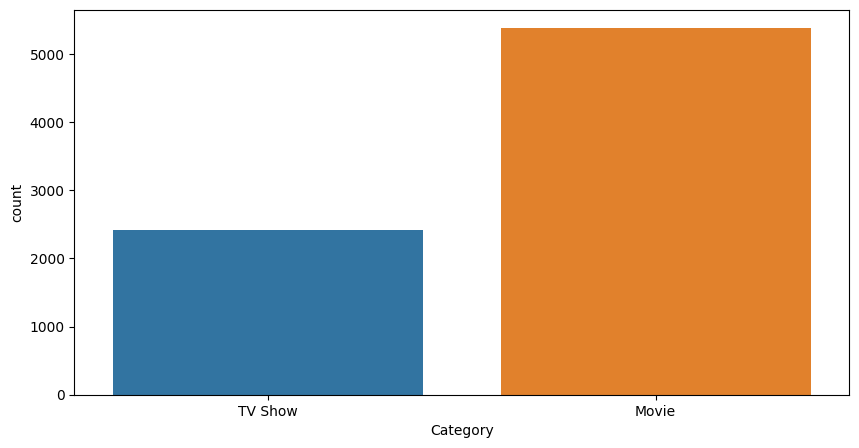

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(df['Category'])
plt.show()

### Insight :
- There are total 2410 TV Shows and 5377 Movies in the dataset

## Filtering :

### Movies that released in year 2018 :

In [71]:
new = df[ (df['Category'] == "Movie") & (df['year'] == 2018) ]
new

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
17,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",2018-10-10,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ...",2018.0
19,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018.0
20,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,2018-09-01,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,2018.0
21,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,2018-09-15,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",2018.0
...,...,...,...,...,...,...,...,...,...,...,...
7765,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2018.0
7770,Movie,Zindagi Kitni Haseen Hay,Anjum Shahzad,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,2018-10-01,TV-14,126 min,"Dramas, International Movies, Romantic Movies",Two young parents struggle to keep their marri...,2018.0
7773,Movie,Zion,Floyd Russ,Zion Clark,United States,2018-08-10,TV-PG,12 min,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...,2018.0
7778,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018.0


### TV Shows that released in 2020 :

In [72]:
new = df[ (df['Category'] == "TV Show") & (df['year']==2018) ]
new

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
11,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018.0
86,TV Show,21 Sarfarosh: Saragarhi 1897,NaN,"Luke Kenny, Mohit Raina, Mukul Dev",India,2018-12-01,TV-14,1 Season,"International TV Shows, TV Dramas","In one of history's greatest last stands, a ba...",2018.0
87,TV Show,21 Thunder,NaN,"Stephanie Bennett, Emmanuel Kabongo, RJ Fether...",Canada,2018-03-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Players and coaches for a Montreal soccer team...,2018.0
134,TV Show,7 Days Out,NaN,NaN,United States,2018-12-21,TV-PG,1 Season,Docuseries,Witness the excitement and drama behind the sc...,2018.0
138,TV Show,72 Dangerous Animals: Asia,NaN,Bob Brisbane,Australia,2018-08-10,TV-14,1 Season,"Docuseries, International TV Shows, Science & ...","From fangs to claws to venomous stings, they a...",2018.0
...,...,...,...,...,...,...,...,...,...,...,...
7713,TV Show,YG Future Strategy Office,NaN,"Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son...",South Korea,2018-10-05,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Co...","K-pop star Seungri, BIGBANG's youngest member,...",2018.0
7717,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018.0
7719,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018.0
7752,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0


### TV Show titles that released in india only :

In [73]:
indian_shows = df[ (df['Category'] == "TV Show") & (df['Country']== "India") ]['Title']
indian_shows

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

### Top 10 Directors who gave highest number of TV Shows and Movies on Netflix :

In [74]:
top_dir = df['Director'].value_counts().head(10)

In [75]:
top_dir

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

### Movies which are comedy type or country of origin is Japan :

In [76]:
df[(df['Category'] == 'Movie')&((df['Type']=='Comedies') |(df['Country']=='Japan'))]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
33,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
72,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021.0
84,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019.0
107,Movie,37 Seconds,Hikari,"Mei Kayama, Misuzu Kanno, Shunsuke Daitoh, Mak...",Japan,2020-01-31,TV-MA,116 min,"Dramas, International Movies","Trapped by society and familial obligations, a...",2020.0
148,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China",2020-02-14,R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2020.0
...,...,...,...,...,...,...,...,...,...,...,...
7426,Movie,Violet Evergarden: Eternity and the Auto Memor...,Haruka Fujita,"Yui Ishikawa, Minako Kotobuki, Aoi Yuki",Japan,2020-04-02,TV-PG,91 min,"Anime Features, International Movies, Sci-Fi &...",A lonely young woman feels trapped at her all ...,2020.0
7590,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,2018-01-22,R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w...",2018.0
7623,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States",2017-05-13,PG-13,86 min,Comedies,"When insurance accidentally pays her millions,...",2017.0
7634,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,2019-05-10,R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019.0


### Movies and TV Shows in which Tom Cruise was casted : 

In [77]:
n_data = df.dropna()

In [78]:
n_data.shape

(4809, 11)

In [79]:
n_data[n_data['Cast'].str.contains('Tom Cruise')]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
3860,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020.0
5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019.0


### Various ratings defined by Netflix :

In [80]:
df['Rating'].nunique() #nunique() counts the unique values in dataset.

14

In [81]:
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

### Insight :
- There are total 14 unique ratings in dataset.

### How many movies that got rating of 'PG' and from Canada :

In [82]:
dta = df[(df['Category'] == 'Movie') & (df['Rating'] == 'PG') & (df['Country'] == "Canada")]
dta

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
254,Movie,A Witches' Ball,Justin G. Dyck,"Morgan Neundorf, Karen Slater, Loukia Ioannou,...",Canada,2018-10-01,PG,91 min,Children & Family Movies,"Beatrix can't wait to be inducted as a witch, ...",2018.0
1369,Movie,Christmas Wedding Planner,Justin G. Dyck,"Stephen Huszar, Kelly Rutherford",Canada,2018-11-15,PG,86 min,"Comedies, International Movies, Romantic Movies",A wedding planner’s world is turned upside dow...,2018.0
1498,Movie,Cop and a Half: New Recruit,Jon Rosenbaum,"Lou Diamond Phillips, Lulu Wilson, Giles Panto...",Canada,2017-08-17,PG,96 min,"Children & Family Movies, Comedies",A world-weary detective is forced to team up w...,2017.0
1985,Movie,Elliot the Littlest Reindeer,Jennifer Westcott,"Josh Hutcherson, Samantha Bee, Martin Short, M...",Canada,2020-11-01,PG,90 min,Children & Family Movies,"When Blitzen suddenly retires, a miniature hor...",2020.0
4182,Movie,Monkey Up,Robert Vince,"Jonathan Mangum, Erin Allin O'Reilly, Kayden M...",Canada,2016-03-19,PG,83 min,"Children & Family Movies, Comedies",A talking monkey famous for his TV commercials...,2016.0
4347,Movie,My Perfect Romance,Justin G. Dyck,"Kimberly-Sue Murray, Christopher Russell, Laur...",Canada,2018-05-01,PG,92 min,"Comedies, International Movies, Romantic Movies","Just in time for Valentine's Day, a program de...",2018.0
5007,Movie,Pup Star: Better 2Gether,Robert Vince,"Kaitlyn Maher, Obba Babatundé, Lombardo Boyar,...",Canada,2017-10-28,PG,93 min,"Children & Family Movies, Comedies",Returning Pup Star champ Tiny has her Yorkie p...,2017.0
6220,Movie,The Christmas Chronicles: Part Two,Chris Columbus,"Kurt Russell, Goldie Hawn, Darby Camp, Jahzir ...",Canada,2020-11-25,PG,115 min,"Children & Family Movies, Comedies","Unhappy over her mom’s new relationship, a now...",2020.0


In [83]:
dta.shape

(8, 11)

Insight :
- There are total 8 movies from canada which got PG Rating.

### TV Shows which got 'R' rating after year 2017 :

In [84]:
df[ (df['Category'] == 'TV Show') & (df['Rating'] == 'R' ) & (df['year'] > 2017)]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
6437,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019.0


### Movies which got 'R' rating after year 2018 :

In [85]:
R_rated = df[ (df['Category'] == 'Movie') & (df['Rating'] == 'R' ) & (df['year'] > 2018)]

In [86]:
R_rated

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
7,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0
14,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020.0
65,Movie,13 Sins,Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,2019-01-13,R,93 min,"Horror Movies, Thrillers",A man agrees to appear on a game show with a $...,2019.0
68,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...","Hong Kong, China, Singapore",2019-04-03,R,113 min,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",2019.0
83,Movie,20th Century Women,Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Lu...",United States,2019-06-28,R,119 min,"Dramas, Independent Movies","In 1979, single bohemian mom Dorothea, hoping ...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...
7659,Movie,Woodshock,"Kate Mulleavy, Laura Mulleavy","Kirsten Dunst, Joe Cole, Pilou Asbæk, Jack Kil...",United States,2020-06-21,R,101 min,"Dramas, Independent Movies, Thrillers","Shattered after her mother's death, a woman fl...",2020.0
7712,Movie,"Yes, God, Yes",Karen Maine,"Natalia Dyer, Timothy Simons, Wolfgang Novogra...",United States,2020-10-22,R,78 min,"Comedies, Dramas, Independent Movies",A devoutly religious teen grapples with her ow...,2020.0
7738,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,2019.0
7776,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0


### Maximum duration of Movies/Shows on Netflix.

In [87]:
df.head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0


In [88]:
df['Duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [89]:
df.Duration.dtypes

dtype('O')

- split the column into 2 columns

In [90]:
movie = pd.DataFrame(df[(df['Category'] == 'Movie')])

In [91]:
movie.reset_index(inplace = True)
movie.drop('index',axis=1, inplace=True)

In [92]:
movie

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
0,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
1,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
2,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
3,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
4,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0
...,...,...,...,...,...,...,...,...,...,...,...
5372,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0
5373,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0
5374,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0
5375,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0


In [93]:
movie[['Minutes','Unit']] = movie['Duration'].str.split(' ', expand= True)

In [94]:
movie

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year,Minutes,Unit
0,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93,min
1,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,78,min
2,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,80,min
3,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123,min
4,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0,95,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,88,min
5373,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,99,min
5374,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,111,min
5375,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0,44,min


In [95]:
movie['Minutes'].dtypes

dtype('O')

### Need to convert object datatype to integer datatype :

In [96]:
movie['Minutes'] = movie['Minutes'].astype(int)

In [97]:
movie['Minutes'].min()

3

In [98]:
movie['Minutes'].max()

312

In [99]:
movie[movie['Minutes']== movie['Minutes'].max()]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year,Minutes,Unit
717,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018.0,312,min


In [100]:
movie[movie['Minutes']== movie['Minutes'].min()]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year,Minutes,Unit
3917,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,2019-06-04,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019.0,3,min


In [101]:
shows =  pd.DataFrame(df[(df['Category'] == 'TV Show')])
shows

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0
11,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018.0
12,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019.0
16,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...
7769,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0
7777,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020.0
7779,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
7781,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,2019.0


In [102]:
shows[['No_of_seasons','Unit']] = shows['Duration'].str.split(' ', expand= True)

In [103]:
shows

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year,No_of_seasons,Unit
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4,Seasons
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,1,Season
11,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018.0,1,Season
12,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019.0,1,Season
16,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019.0,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,1,Season
7777,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020.0,1,Season
7779,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,2,Seasons
7781,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,2019.0,1,Season


In [104]:
shows['No_of_seasons'].dtypes

dtype('O')

### Need to convert object datatype to integer datatype.

In [105]:
shows['No_of_seasons'] = shows['No_of_seasons'].astype(int)

In [106]:
shows.No_of_seasons.min()

1

In [107]:
shows.No_of_seasons.max()

16

In [108]:
shows[shows['No_of_seasons']== shows['No_of_seasons'].max()]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year,No_of_seasons,Unit
2538,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2020-05-09,TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020.0,16,Seasons


In [109]:
shows[shows['No_of_seasons']== shows['No_of_seasons'].min()]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year,No_of_seasons,Unit
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,1,Season
11,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018.0,1,Season
12,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019.0,1,Season
16,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019.0,1,Season
26,TV Show,(Un)Well,NaN,NaN,United States,2020-08-12,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...,2020.0,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768,TV Show,Zig & Sharko,NaN,NaN,France,2017-12-01,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t...",2017.0,1,Season
7769,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,1,Season
7777,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020.0,1,Season
7781,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,2019.0,1,Season


### Insight :
- Maximum duration of movies is 312 min and minimum duration is 3 min.
- Maximum duration of Tv Shows in 16 seasons and minimum duration is 1 season

### Country which has highest no. of Movies and TV Shows.

In [110]:
shows['Country'].value_counts()

United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: Country, Length: 183, dtype: int64

In [111]:
shows['Country'].value_counts().head(1)

United States    705
Name: Country, dtype: int64

In [112]:
movie['Country'].value_counts()

United States                                                   1850
India                                                            852
United Kingdom                                                   193
Canada                                                           118
Spain                                                             89
                                                                ... 
United Kingdom, Denmark, Canada, Croatia                           1
United States, South Korea                                         1
Kenya, United States                                               1
India, Turkey                                                      1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: Country, Length: 590, dtype: int64

In [113]:
movie['Country'].value_counts().head(1)

United States    1850
Name: Country, dtype: int64

### Insight :
- United States has highest no of TV shows and Movies

### Sorting Whole dataset according to year :

In [114]:
df.sort_values(by = 'year').head(5)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
7115,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0
1765,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0
3248,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0
5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0
3840,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0


In [115]:
df.sort_values(by = 'year',ascending = False).head(5)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia",2021-01-01,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021.0
5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,2021-01-01,PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021.0
980,TV Show,Bling Empire,NaN,NaN,NaN,2021-01-15,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021.0
5955,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,2021-01-10,PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...,2021.0
366,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",NaN,2021-01-12,TV-MA,81 min,"International Movies, Thrillers","Looking for a fresh start, a park ranger gets ...",2021.0


### Find all records where category is Movie and Type is 'Drama' or Category is TV show and type is 'Kids' TV'

In [116]:
df.head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0


In [117]:
df[(df['Category'] == 'Movie') & (df['Type'] == 'Dramas')].head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
7,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0


In [118]:
df[(df['Category'] == 'TV Show') & (df['Type'] == "Kids' TV")].head(2)

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
111,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020.0
276,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",2020-07-01,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020.0


In [119]:
df[(df['Category'] == 'Movie') & (df['Type'] == 'Dramas') | (df['Category'] == 'TV Show') & (df['Type'] == "Kids' TV")]

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
7,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0
111,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020.0
170,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019.0
232,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011.0
...,...,...,...,...,...,...,...,...,...,...,...
7668,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017.0
7717,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018.0
7719,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018.0
7758,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019.0
